In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA

In [61]:
# import demographic info from all datasets

enigma=pd.read_csv('/Users/emilyolafson/GIT/ENIGMA/data/Behaviour_Information_ALL_April7_2022.csv', header=0)
hcpaging= pd.read_csv('/Users/emilyolafson/GIT/ENIGMA/data/HCPAGING/hcpaging_subject_info.csv', header=0)
hcpya = pd.read_csv('/Users/emilyolafson/GIT/ENIGMA/data/HCP_YA/hcp_subjinfo_age_sex.csv', header=0)

enigma.rename(columns={'BIDS_ID':'Subject', 'SEX':'sex', 'AGE':'age'},inplace=True)
hcpaging.rename(columns={'subjectid':'Subject'},inplace=True)
hcpya.rename(columns={'subjectid':'Subject'},inplace=True)

enigma_id = enigma.pop('Subject')
enigma_age = enigma.pop('age')
enigma_sex = enigma.pop('sex')

hcpaging_id = hcpaging.pop('Subject')
hcpaging_age = hcpaging.pop('age')
hcpaging_sex = hcpaging.pop('sex')

hcpya_id = hcpya.pop('Subject')
hcpya_age = hcpya.pop('age')
hcpya_sex = hcpya.pop('sex')
enigma_agesex=pd.DataFrame(data=np.transpose([enigma_id, enigma_age, enigma_sex]), columns=['Subject', 'age', 'sex'])
hcpaging_agesex=pd.DataFrame(data=np.transpose([hcpaging_id, hcpaging_age, hcpaging_sex]), columns=['Subject', 'age', 'sex'])
hcpya_agesex=pd.DataFrame(data=np.transpose([hcpya_id, hcpya_age, hcpya_sex]), columns=['Subject', 'age', 'sex'])

# import CT from all datasets

# ENIGMA
# load cortical thickness data to get headers (regions)
enigma_rh_thickness =  pd.read_table('/Users/emilyolafson/GIT/ENIGMA/data/FREESURFER_ENIGMA/aseg_aparc/aparc_rh_stats_thickness.txt', header=0)
enigma_lh_thickness =  pd.read_table('/Users/emilyolafson/GIT/ENIGMA/data/FREESURFER_ENIGMA/aseg_aparc/aparc_lh_stats_thickness.txt', header=0)
enigma_rh_thickness.rename(columns = {'rh.aparc.thickness':'Subject'},inplace=True)
enigma_lh_thickness.rename(columns = {'lh.aparc.thickness':'Subject'},inplace=True)

enigma_thickness = enigma_lh_thickness.merge(enigma_rh_thickness, on='Subject')

ids = enigma_thickness['Subject']
lst = [e[5:] for e in ids]
site = [e[0:4] for e in ids]
enigma_thickness['Subject']=lst

# HCPAGING
hcpaging_thickness =  pd.read_table('/Users/emilyolafson/GIT/ENIGMA/data/HCPAGING/hcpaging_aparc_thickness_stats.tsv', header=0)
ids = hcpaging_thickness['Subject']
lst = [e[:10] for e in ids]
hcpaging_thickness['Subject']=lst

# HCP YA
hcpya_thickness =  pd.read_table('/Users/emilyolafson/GIT/ENIGMA/data/HCP_YA/hcp_aparc_thickness_stats.tsv', header=0)

# merge age and sex columns together for plotting 
enigma_all = enigma_thickness.merge(enigma_agesex, on='Subject')
enigma_all['dataset']='ENIGMA'
enigma_all['site']=site
enigma_all=enigma_all.replace({'sex': {1: 'F', 2: 'M'}})
hcpaging_all = hcpaging_thickness.merge(hcpaging_agesex, on='Subject')
hcpaging_all['dataset']='HCP_AGING'
hcpaging_all['site']='HCP_AGING'
hcpya_all = hcpya_thickness.merge(hcpya_agesex, on='Subject')
hcpya_all['dataset']='HCP_YA'
hcpya_all['site']='HCP_YA'

# merge hcpaging and hcpya
hcp_controls=pd.concat((hcpaging_all,hcpya_all), axis=0)

hcp_controls.to_csv('/Users/emilyolafson/GIT/ENIGMA/data/FREESURFER_ENIGMA/hcp_aging_ya_thickness_datasetvar.csv')
hcp_controls['disease_status']=0
enigma_all['disease_status']=1

thickness_all = pd.concat((hcp_controls, enigma_all), axis=0)

thickness_all.to_csv('/Users/emilyolafson/GIT/ENIGMA/data/FREESURFER_ENIGMA/hcp_aging_ya_enigma_thickness_datasetvar.csv')

np.where(thickness_all['sex']==3)

thickness_all.iloc[2401]
# COMBAT

Subject                                 sub-r046s008
lh_bankssts_thickness                          2.557
lh_caudalanteriorcingulate_thickness            2.98
lh_caudalmiddlefrontal_thickness               2.641
lh_cuneus_thickness                            1.843
                                            ...     
age                                             51.0
sex                                              3.0
dataset                                       ENIGMA
site                                            R046
disease_status                                     1
Name: 679, Length: 76, dtype: object

In [37]:
combat_thickness =  pd.read_table('/Users/emilyolafson/GIT/ENIGMA/data/FREESURFER_ENIGMA/hcp_aging_ya_enigma_thickness_datasetvar_COMBAT.csv', header=0, sep=',')


<ipython-input-37-0249020f2f49>:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [145]:
# get the mean and std for each age using a windowed approach

size_groups = np.empty(shape=(73,1))
ages = np.empty(shape=(73,1))
mean_groups = np.empty(shape=(73,len(hcp_controls.columns[1:71])))
std_groups = np.empty(shape=(73,len(hcp_controls.columns[1:71])))

counter=0
for age in range(21+1,93+2):
    subset=hcp_controls[(hcp_controls['age'] > age-1) & (hcp_controls['age'] < age+1)]
    size_groups[counter]=subset.shape[0]
    mean_groups[counter,:]=np.mean(subset.iloc[:,1:71],axis=0)
    std_groups[counter,:]=np.std(subset.iloc[:,1:71],axis=0)
    ages[counter]=age
    counter=counter+1



In [146]:
cols = hcp_controls.columns[1:71]
meancols = [col+'_mean' for col in cols]
stdcols = [col+'_std' for col in cols]

colnames_means = ['age', 'size'] + meancols 
colnames_stds = ['age', 'size'] + stdcols 

In [147]:
tmp_m= np.concatenate([ages,size_groups,mean_groups],axis=1)
tmp_s= np.concatenate([ages,size_groups,std_groups],axis=1)

meantable = pd.DataFrame(data=tmp_m, columns=colnames_means)
stdtable = pd.DataFrame(data=tmp_s, columns=colnames_stds)

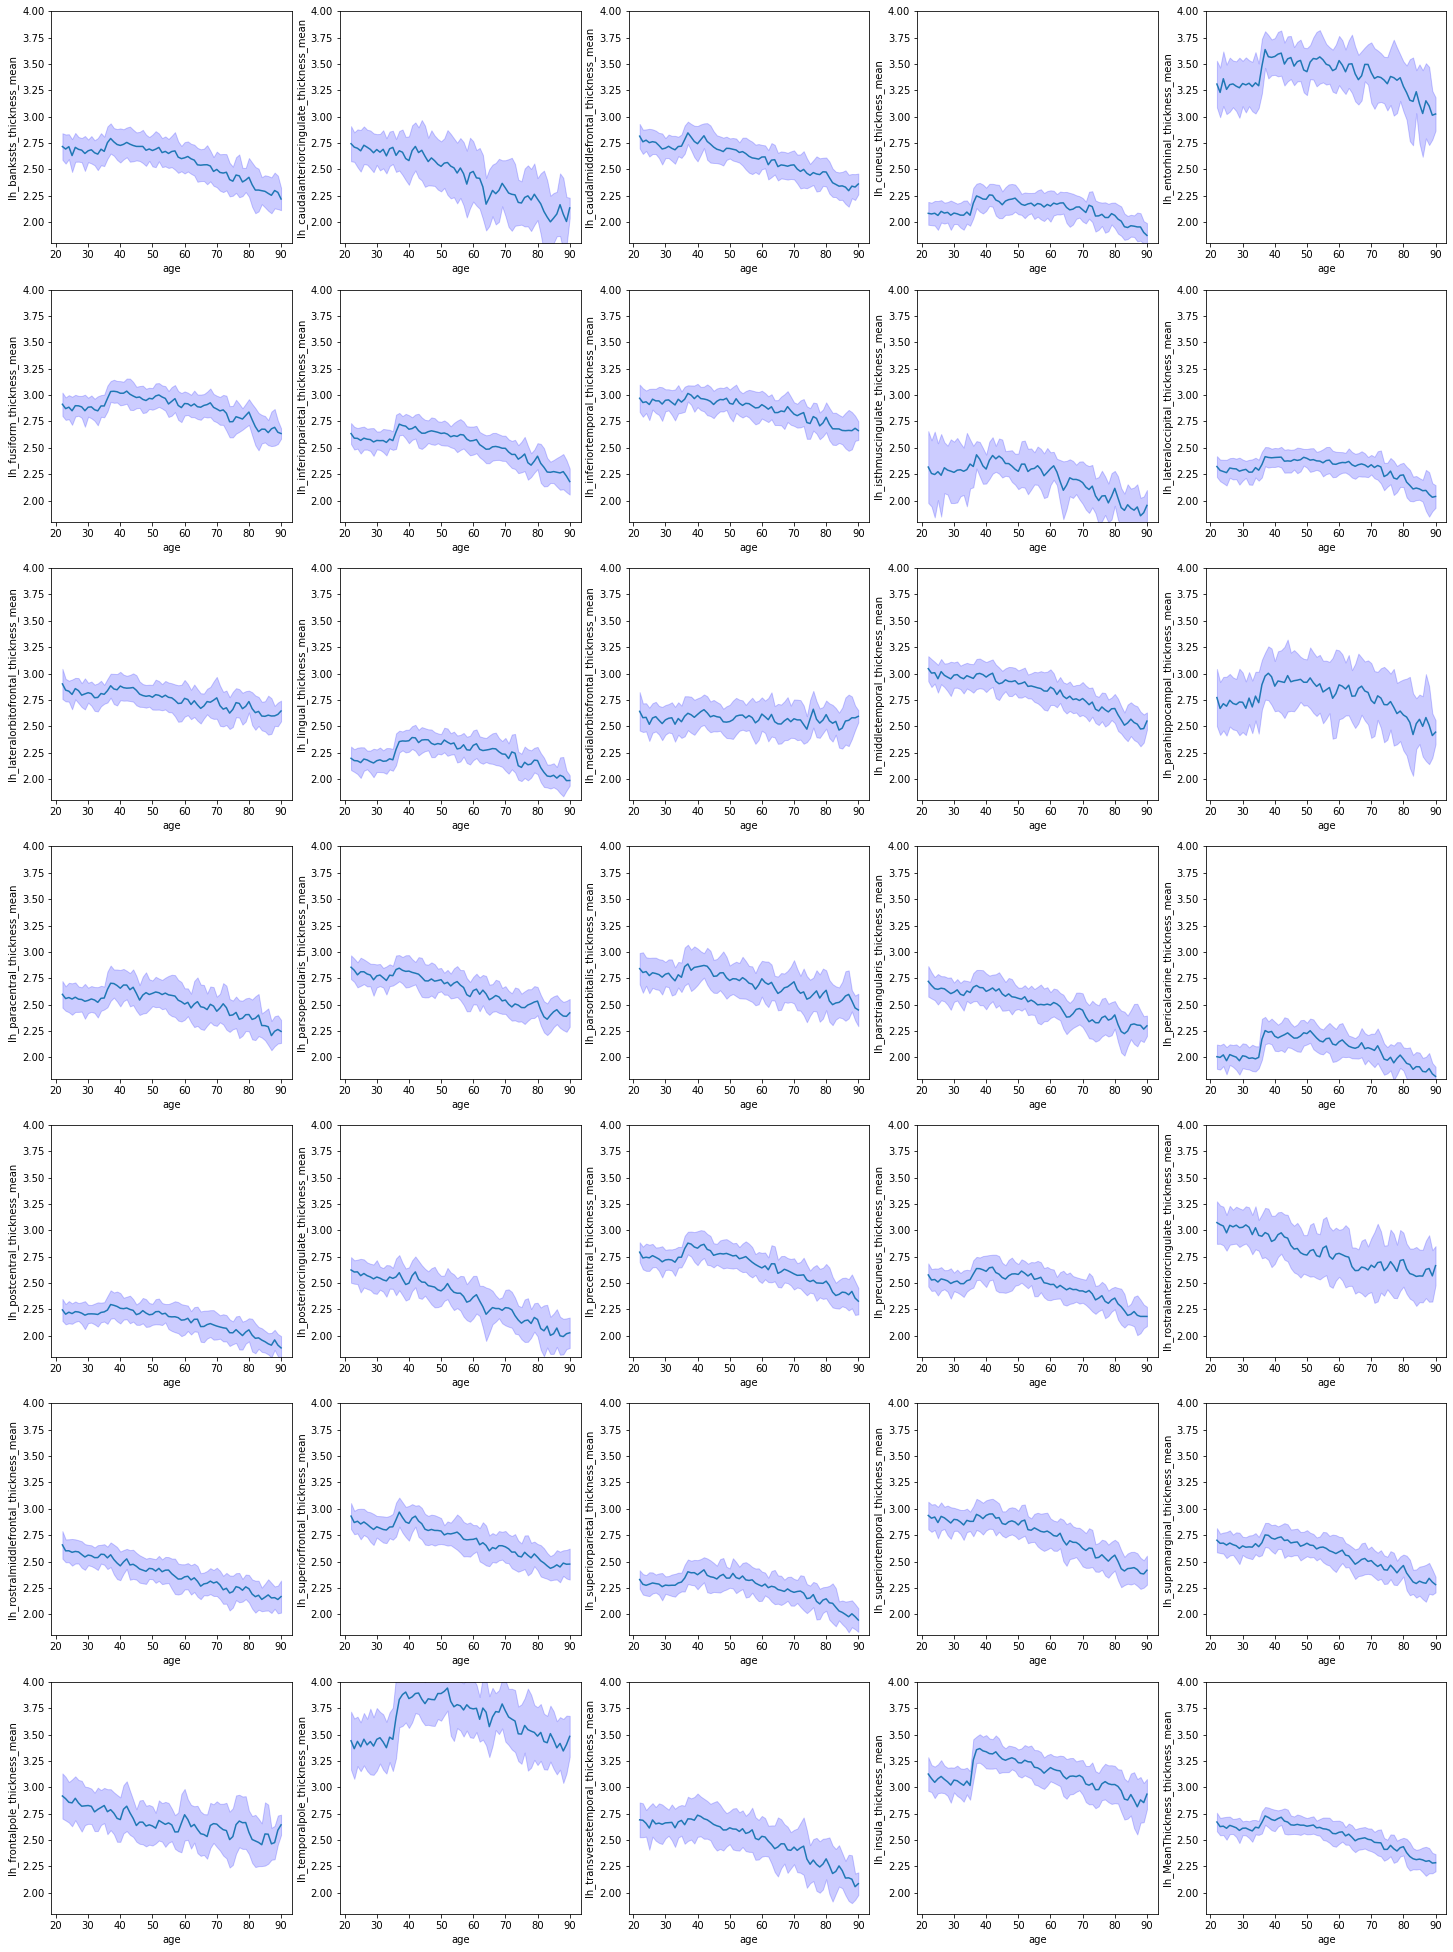

In [148]:
fig, axs = plt.subplots(ncols=5, nrows=7,figsize=(25,35))
counter =0
rowcount=0
# left hem

for i in range(2,37):
    yvar= meantable.columns[i]
    y_std = stdtable.iloc[:,i]
    sns.lineplot(x='age', y=yvar, data=meantable, ax=axs[rowcount,counter%5],palette="hls")
    axs[rowcount,counter%5].fill_between(meantable['age'], meantable[yvar] - y_std,  meantable[yvar] + y_std, color='b', alpha=0.2)
    axs[rowcount,counter%5].set_ylim([1.8, 4])
    axs[rowcount,counter%5].set_ylim([1.8, 4])
    axs[rowcount,counter%5].tick_params(axis='x', labelsize=10)
    axs[rowcount,counter%5].tick_params(axis='y', labelsize=10)
   # axs[rowcount,counter%5].get_legend().remove()
   # axs[rowcount,counter%5].legend(fontsize=8)
    counter = counter +1
    if (counter%5 ==0) & (counter!=0):
        rowcount = rowcount+1

plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/lefthem_CT_hcp_YA_AGING_ENIGMA_meanstd.jpeg')
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/lefthem_CT_hcp_YA_AGING_ENIGMA_meanstd.pdf')

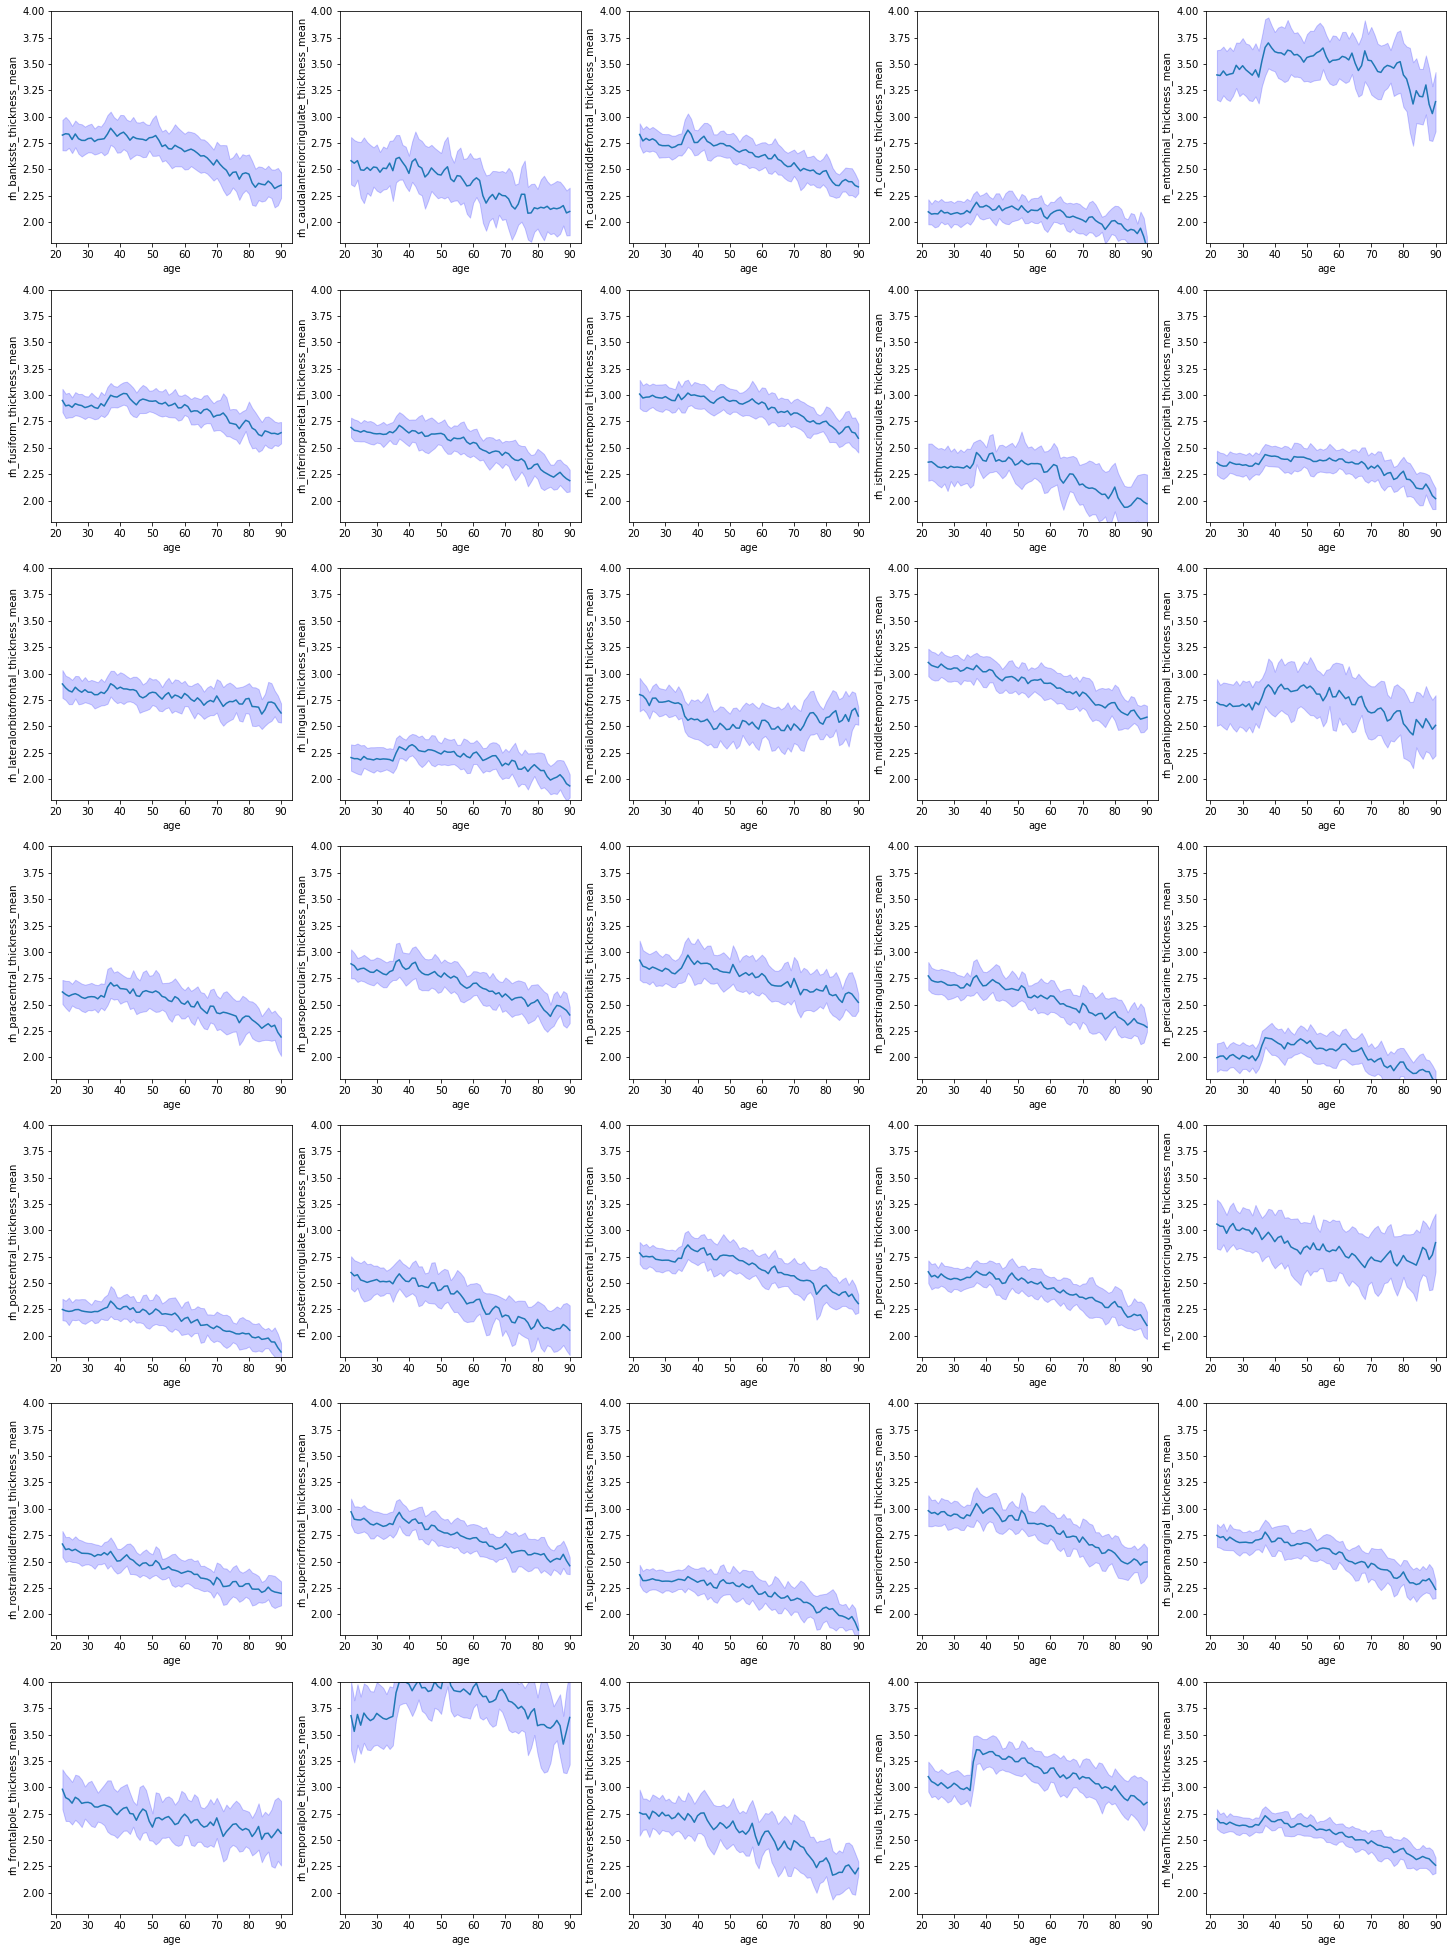

In [149]:
fig, axs = plt.subplots(ncols=5, nrows=7,figsize=(25,35))
counter =0
rowcount=0
# left hem

for i in range(37,72):
    yvar= meantable.columns[i]
    y_std = stdtable.iloc[:,i]
    sns.lineplot(x='age', y=yvar, data=meantable, ax=axs[rowcount,counter%5],palette="hls")
    axs[rowcount,counter%5].fill_between(meantable['age'], meantable[yvar] - y_std,  meantable[yvar] + y_std, color='b', alpha=0.2)
    axs[rowcount,counter%5].set_ylim([1.8, 4])
    axs[rowcount,counter%5].set_ylim([1.8, 4])
    axs[rowcount,counter%5].tick_params(axis='x', labelsize=10)
    axs[rowcount,counter%5].tick_params(axis='y', labelsize=10)
   # axs[rowcount,counter%5].get_legend().remove()
   # axs[rowcount,counter%5].legend(fontsize=8)
    counter = counter +1
    if (counter%5 ==0) & (counter!=0):
        rowcount = rowcount+1

plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/righthem_CT_hcp_YA_AGING_ENIGMA_meanstd.jpeg')
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/righthem_CT_hcp_YA_AGING_ENIGMA_meanstd.pdf')